# Sample

## Import Libraries

In [1244]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, NeighborhoodComponentsAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, PassiveAggressiveClassifier
import phik
# Import mlflow
import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeRegressor
import phik
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import itertools
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from numpy.ma import MaskedArray
import sklearn.utils.fixes
from sklearn.preprocessing import OrdinalEncoder

sklearn.utils.fixes.MaskedArray = MaskedArray

## Import Datasets

In [1245]:
df = pd.read_csv(r'train_file.csv', sep=";")
test_df = pd.read_csv(r'test_file.csv', sep=";")

In [1246]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


#  Exploratory Data Analysis

In [1247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32910 non-null  int64 
 1   job          32910 non-null  object
 2   marital      32910 non-null  object
 3   education    32910 non-null  object
 4   default      32910 non-null  object
 5   housing      32910 non-null  object
 6   loan         32910 non-null  object
 7   contact      32910 non-null  object
 8   month        32910 non-null  object
 9   day_of_week  32910 non-null  object
 10  duration     32910 non-null  int64 
 11  campaign     32910 non-null  int64 
 12  previous     32910 non-null  int64 
 13  poutcome     32910 non-null  object
 14  y            32910 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


In [1248]:
df[["age","duration","campaign","previous"]].describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


In [1249]:
df['y'].value_counts(normalize=True)

no     0.887359
yes    0.112641
Name: y, dtype: float64

`NOTE:` Unbalanced learning, test over/under sampling.

#### Check for Duplicated Features and Rows



In [1250]:
duplicate_features = get_duplicate_features(df)
duplicate_features

,Desc,feature1,feature2


In [1251]:
duplicated_rows = df.loc[df.duplicated(), :]
(len(duplicated_rows)/len(df)) * 100

0.024308720753570344

In [1252]:
df = df.drop_duplicates(keep='first')
df.shape

(32902, 15)

In [1253]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'y'],
      dtype='object')

### Check for Missing Values

In [1254]:
print("# of missing values by variable:")
df.isnull().sum()

# of missing values by variable:


age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

## 2.1 Univariate Analysis
### Outliers and Distribution


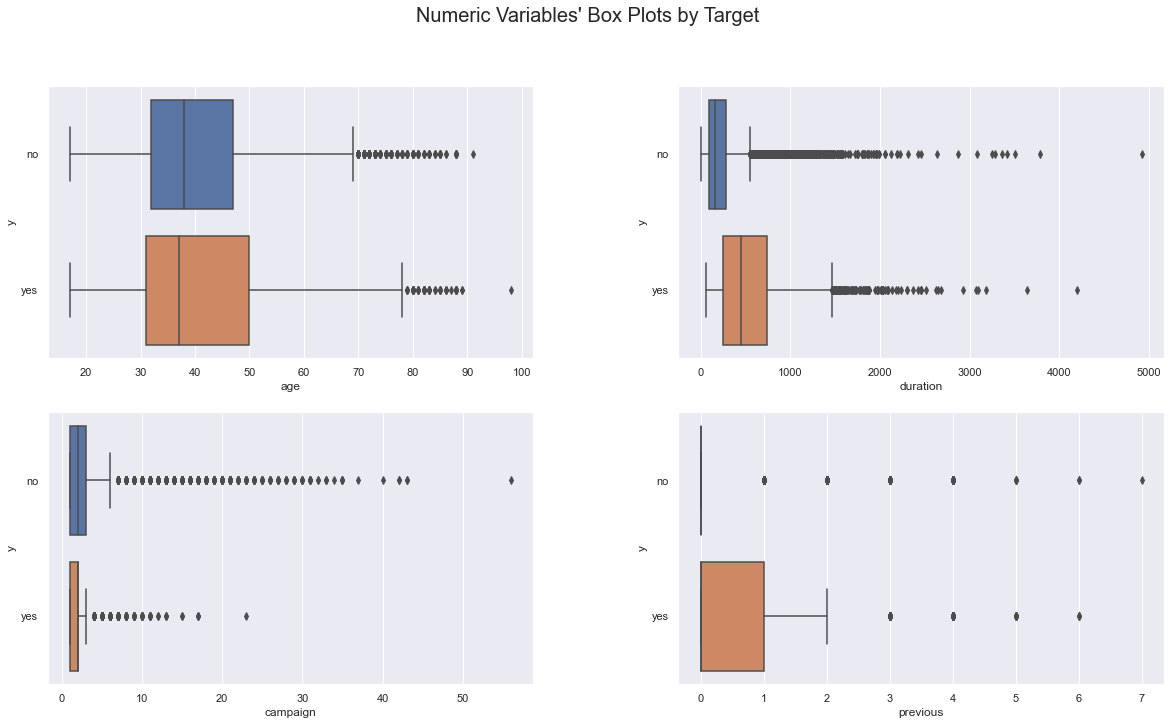

In [1255]:
metric_features = ['age', 'duration', 'campaign', 'previous']

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], y=df['y'], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title, fontsize=20)
plt.subplots_adjust(wspace=0.3)

plt.show()

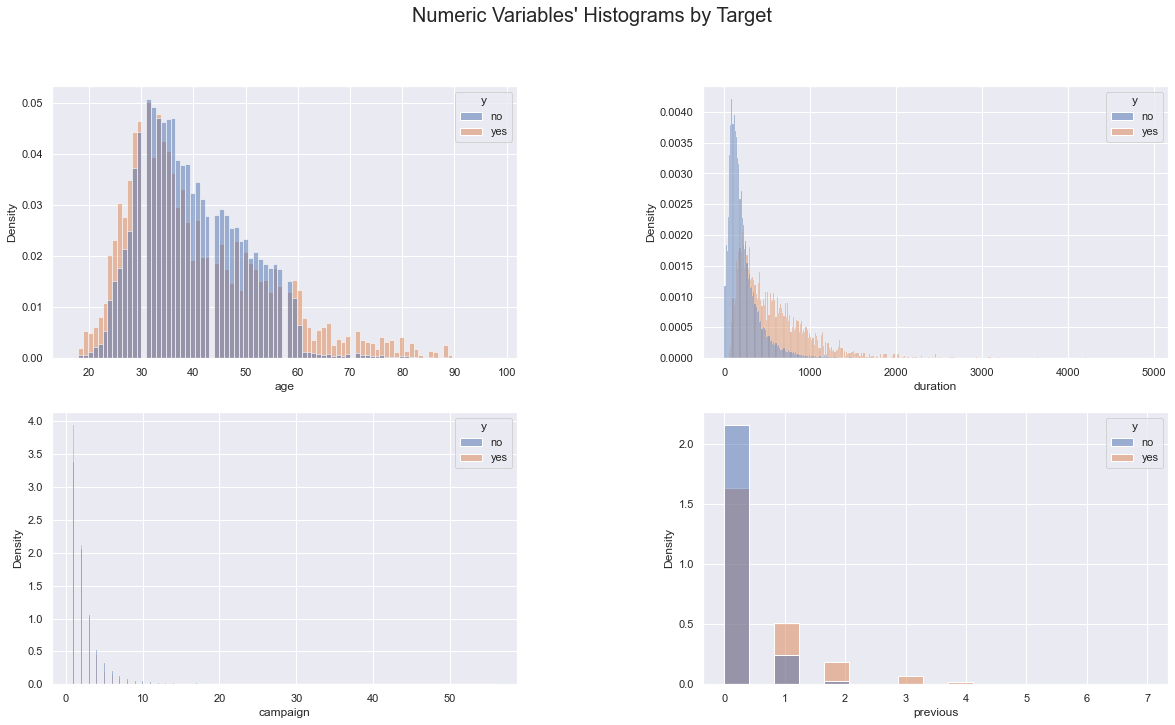

In [1256]:

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], hue=df['y'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title, fontsize=20)

plt.subplots_adjust(wspace=0.4)

plt.show()

According to the boxplots and the dispersions/bar plots, we can conclude that:
- Clients that tend to accept the campaign have a higher dispersion of age, it means that there's no specific group of age that tend to accept this campaign. 
- The durations of the call tend to be superior for the clients that accept the campaign.
- The number of contacts for the client before this campaign are superior for the clients that accept the campaign.

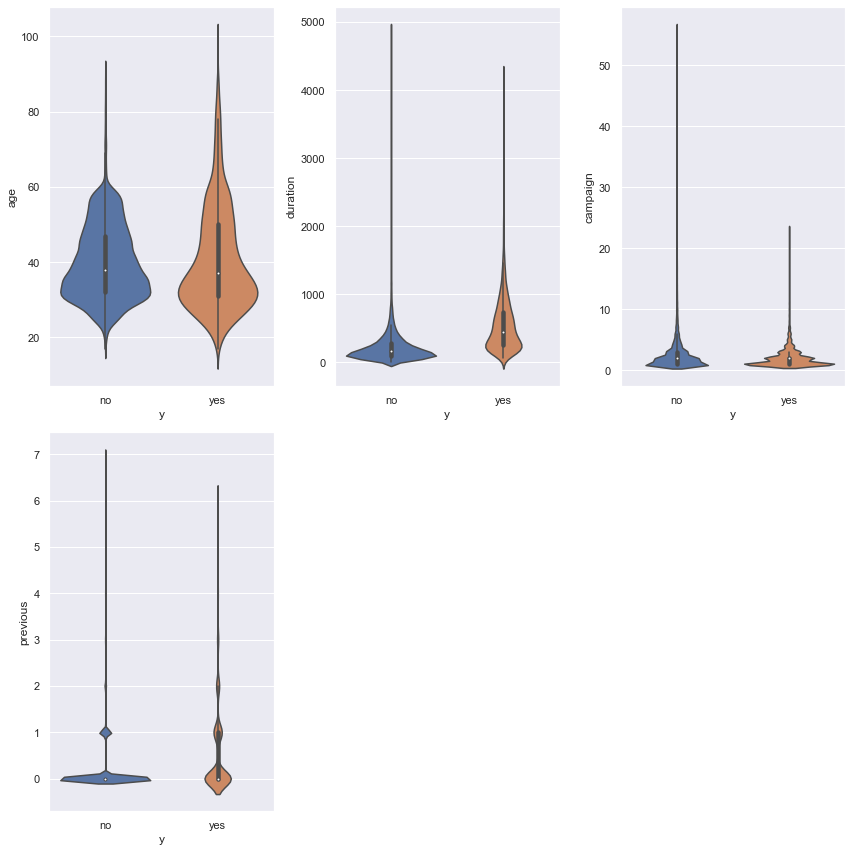

In [1257]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)


sns.violinplot(data=df, x = 'y', y = 'age', ax=ax1)
sns.violinplot(data=df, x = 'y', y = 'duration', ax=ax2)
sns.violinplot(data=df, x = 'y', y = 'campaign', ax=ax3)
sns.violinplot(data=df, x = 'y', y = 'previous', ax=ax4)



plt.tight_layout()
plt.show()

### Target Variable Information

Text(0, 0.5, '')

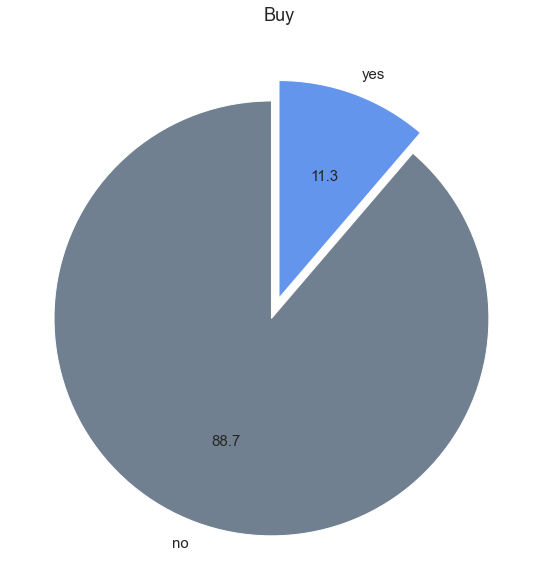

In [1258]:
plt.figure(figsize=(10,10))
df["y"].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Buy', fontsize = 18)
plt.ylabel('')

The dataset is imbalanced - there's a significant number of negatives comparing to positives.

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

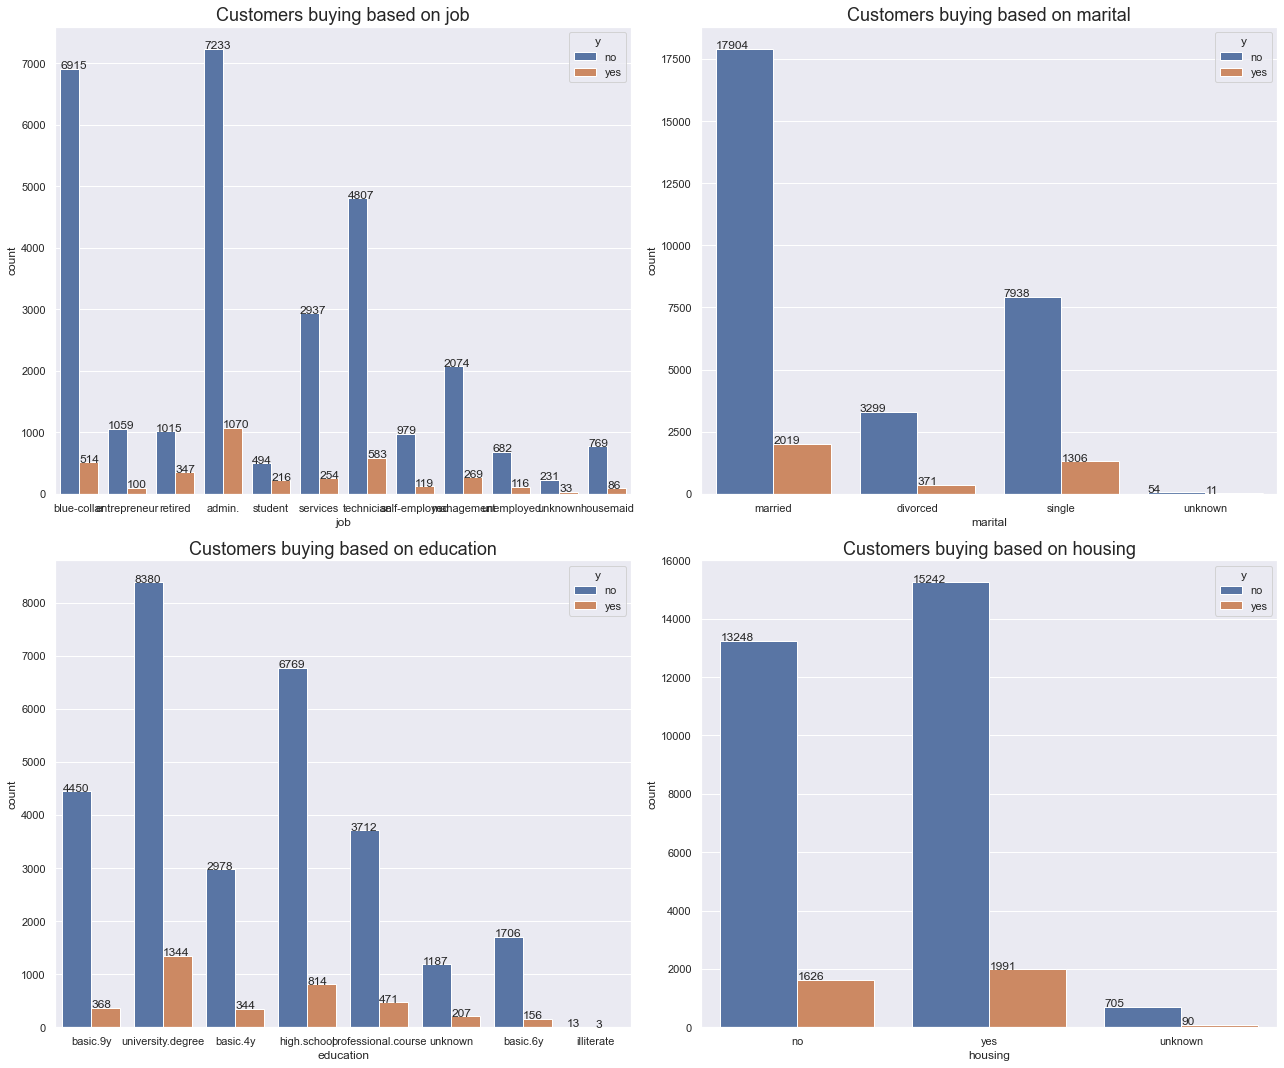

In [1259]:
column1l=['job',
       'marital', 'education', 'housing']
plt.figure(figsize=(18,15))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(2, 2, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['y'])
    ax.set_title('Customers buying based on '+ i,fontdict=None,fontsize = 18)
    plt.tight_layout()
    for p in ax.patches:
#         txt = str(p.get_height().round(2)) + '%'
        txt = str(p.get_height().round(0))
        txt_x = p.get_x() 
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
plt.show()

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

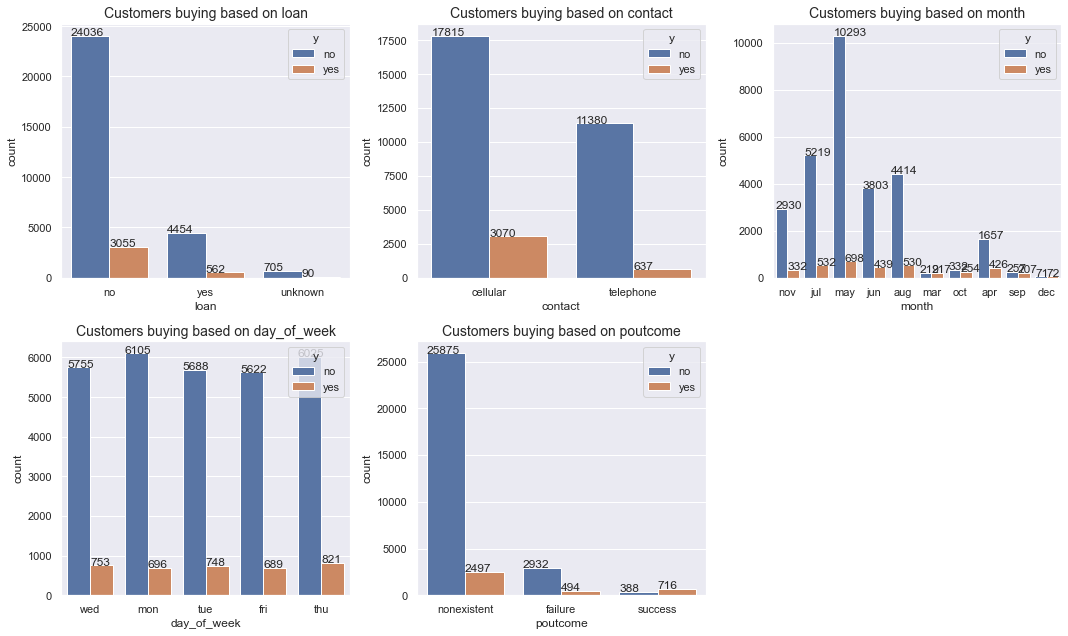

In [1260]:
column1l=['loan', "contact", "month", "day_of_week", "poutcome"]
plt.figure(figsize=(15,9))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(2, 3, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['y'])
    ax.set_title('Customers buying based on '+ i,fontdict=None,fontsize = 14)
    plt.tight_layout()
    for p in ax.patches:
#         txt = str(p.get_height().round(2)) + '%'
        txt = str(p.get_height().round(0))
        txt_x = p.get_x() 
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
plt.show()

- Individuals with administrative careers, married and with an university degree are the ones that have a positive outcome for the campaign. 
- Individuals with house and without loans tend to accept more the campaign.
- There's no meaningful insight from the month and day of week.
- There's a higher number of clients that accept the camapaign for the first time, comparing to clients with produts from other campaigns.


## Multivariate Analysis

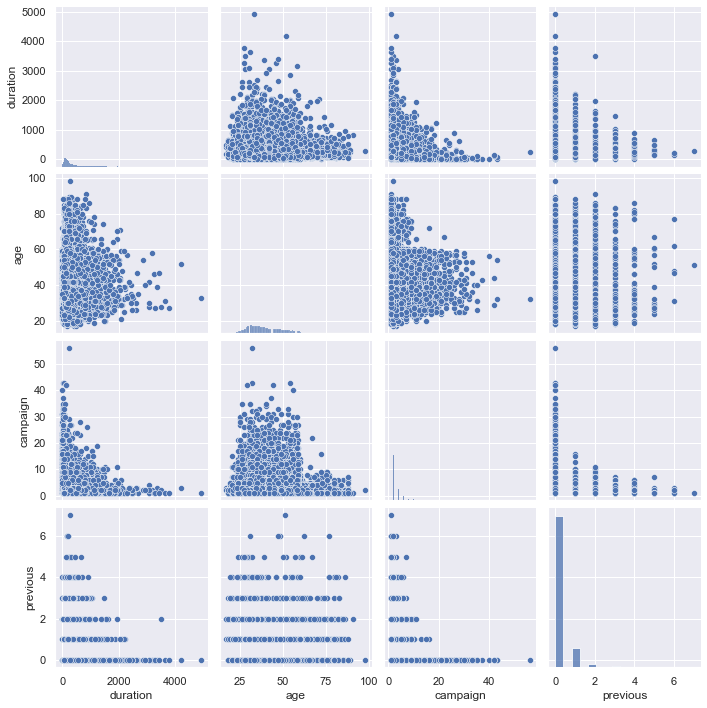

In [1261]:
g1 = sns.pairplot(df[['duration', 'age', 'campaign','previous','y' ]])
plt.show()

In [1262]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no



## Classifier for "unknown" values
Since the percentage of the value "unknown" isn't low, the unknown values will be inputed.
To use the decision tree classifier on my dataset I have to do some feature enconding.

In [1263]:
# Function to create the dummy variables 
def dummy_variable(column, df):
    dummy = np.unique(df[column])
    for i in dummy:
        df.loc[df[column] != i,column + "_" + i] = 0
        df.loc[df[column] == i,column + "_" + i] = 1
    df = df.drop(column, axis=1)
    return df

# Replace the column y with 0- no and 1-yes
df['y'] = np.where(df['y']=="no", 0, df['y'])
df['y'] = np.where(df['y']=="yes", 1, df['y'])
df['y'] = df['y'].astype(str).astype(int)

# Replace "contact" with 0-cel and 1-tel
df["contact"].replace({"cellular": 0, "telephone":1}, inplace=True)
test_df["contact"].replace({"cellular": 0, "telephone":1}, inplace=True)

# Month
df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,
         "nov":9, "dec":10}, inplace = True)

test_df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,
         "nov":9, "dec":10}, inplace = True)

# Day of Week
df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)
test_df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)

# poutcome
df = dummy_variable("poutcome", df)
test_df = dummy_variable("poutcome",test_df)


##########
y = df['y']
df.drop(columns='y',axis=1, inplace=True)

In [1264]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,blue-collar,married,basic.9y,unknown,no,no,0,9,3,227,4,0,0.0,1.0,0.0
1,37,entrepreneur,married,university.degree,no,no,no,1,9,3,202,2,1,1.0,0.0,0.0
2,78,retired,married,basic.4y,no,no,no,0,5,1,1148,1,0,0.0,1.0,0.0
3,36,admin.,married,university.degree,no,yes,no,1,3,1,120,2,0,0.0,1.0,0.0
4,59,retired,divorced,university.degree,no,no,no,0,4,2,368,2,0,0.0,1.0,0.0


In [1265]:
from sklearn.impute import KNNImputer

## Replace "unknown" with null - For Train

df.replace("unknown", np.nan, inplace = True)

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
df_noNaN=df[~row_has_NaN]
print(len(rows_with_NaN),len(rows_with_NaN)/len(df)*100)
print(len(df_noNaN))


## For Test
test_df.replace("unknown", np.nan, inplace = True)
is_NaN = test_df.isnull()
test_row_has_NaN = is_NaN.any(axis=1)
test_rows_with_NaN = test_df[test_row_has_NaN]
test_df_noNaN=test_df[~test_row_has_NaN]


8634 26.241565862257616
24268


In [1266]:
df_toFill=pd.concat([df_noNaN,rows_with_NaN]).sort_index()

test_df_toFill=pd.concat([test_df_noNaN,test_rows_with_NaN]).sort_index()

In [1267]:
df_education = DecisionTreeClassifier(random_state=0)
df_housing = DecisionTreeClassifier(random_state=0)
df_job = DecisionTreeClassifier(random_state=0)
df_loan = DecisionTreeClassifier(random_state=0)
df_marital = DecisionTreeClassifier(random_state=0)
df_default = DecisionTreeClassifier(random_state=0)





### Fill Education Values

In [1268]:
##################### For Train #########################
# column without NaN for training
y_train = df_toFill[~df_toFill['education'].isna()]['education']
# column just with NaN
y_target = df_toFill[df_toFill['education'].isna()]['education']

X_train = df_toFill[~df_toFill['education'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['education'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)


test_X_target = test_df_toFill[test_df_toFill['education'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)


# column without NaN for training
y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_education.fit(X_train,y_train)
pred = df_education.predict(X_target)
pred = pred.astype(int)
pred_education =[]
for idx in range(len(pred)):
    pred_education.append(enc.categories_[0][pred[idx]])
pred_education=pd.Series(pred_education,name='education',index=y_target.index)


### For Test
pred_test = df_education.predict(test_X_target)
pred_test = pred_test.astype(int)
pred_education_test =[]
for idx in range(len(pred_test)):
    pred_education_test.append(enc.categories_[0][pred_test[idx]])
pred_education_test=pd.Series(pred_education_test,name='education',index=test_X_target.index)




### Fill housing

In [1269]:
y_train = df_toFill[~df_toFill['housing'].isna()]['housing']
y_target = df_toFill[df_toFill['housing'].isna()]['housing']
X_train = df_toFill[~df_toFill['housing'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['housing'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)


test_X_target = test_df_toFill[test_df_toFill['housing'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)


y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_housing.fit(X_train,y_train)
pred = df_housing.predict(X_target)
pred = pred.astype(int)
pred_housing =[]
for idx in range(len(pred)):
    pred_housing.append(enc.categories_[0][pred[idx]])
pred_housing=pd.Series(pred_housing,name='housing',index=y_target.index)


### For Test
pred_test = df_housing.predict(test_X_target)
pred_test = pred_test.astype(int)
pred_housing_test =[]
for idx in range(len(pred_test)):
    pred_housing_test.append(enc.categories_[0][pred_test[idx]])
pred_housing_test=pd.Series(pred_housing_test,name='housing',index=test_X_target.index)


### Fill job

In [1270]:
y_train = df_toFill[~df_toFill['job'].isna()]['job']
y_target = df_toFill[df_toFill['job'].isna()]['job']
X_train = df_toFill[~df_toFill['job'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['job'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)

test_X_target = test_df_toFill[test_df_toFill['job'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)

y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_job.fit(X_train,y_train)
pred = df_job.predict(X_target)
pred = pred.astype(int)
pred_job =[]
for idx in range(len(pred)):
    pred_job.append(enc.categories_[0][pred[idx]])
pred_job = pd.Series(pred_job,name='job',index=y_target.index)

### For Test
pred_test = df_job.predict(test_X_target)
pred_test = pred_test.astype(int)
pred_job_test =[]
for idx in range(len(pred_test)):
    pred_job_test.append(enc.categories_[0][pred_test[idx]])
pred_job_test=pd.Series(pred_job_test,name='job',index=test_X_target.index)



### Fill loan

In [1271]:
y_train = df_toFill[~df_toFill['loan'].isna()]['loan']
y_target = df_toFill[df_toFill['loan'].isna()]['loan']
X_train = df_toFill[~df_toFill['loan'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['loan'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)


test_X_target = test_df_toFill[test_df_toFill['loan'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)


y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_loan.fit(X_train,y_train)
pred = df_loan.predict(X_target)
pred = pred.astype(int)
pred_loan =[]
for idx in range(len(pred)):
    pred_loan.append(enc.categories_[0][pred[idx]])
pred_loan = pd.Series(pred_loan,name='loan',index=y_target.index)


### For Test
pred_test = df_loan.predict(test_X_target)
pred_test = pred_test.astype(int)
pred_loan_test =[]
for idx in range(len(pred_test)):
    pred_loan_test.append(enc.categories_[0][pred_test[idx]])
pred_loan_test=pd.Series(pred_loan_test,name='loan',index=test_X_target.index)


### Fill marital

In [1272]:
y_train = df_toFill[~df_toFill['marital'].isna()]['marital']
y_target = df_toFill[df_toFill['marital'].isna()]['marital']
X_train = df_toFill[~df_toFill['marital'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['marital'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)

#test_X_target = test_df_toFill[test_df_toFill['marital'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)

y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_marital.fit(X_train,y_train)
pred = df_marital.predict(X_target)
pred = pred.astype(int)
pred_marital =[]
for idx in range(len(pred)):
    pred_marital.append(enc.categories_[0][pred[idx]])
pred_marital = pd.Series(pred_marital,name='marital',index=y_target.index)





### Fill default

In [1273]:
y_train = df_toFill[~df_toFill['default'].isna()]['default']
y_target = df_toFill[df_toFill['default'].isna()]['default']
X_train = df_toFill[~df_toFill['default'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)
X_target = df_toFill[df_toFill['default'].isna()].drop(['education','housing','job','loan','marital','default'],axis=1)

test_X_target = test_df_toFill[test_df_toFill['default'].isna()].drop(['education','housing','job', 'loan', 'marital','default'],axis=1)

y_train = pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train = enc.fit_transform(y_train)
df_default.fit(X_train,y_train)
pred = df_default.predict(X_target)
pred = pred.astype(int)
pred_default =[]
for idx in range(len(pred)):
    pred_default.append(enc.categories_[0][pred[idx]])
pred_default = pd.Series(pred_default,name='default',index=y_target.index)

### For Test
pred_test = df_default.predict(test_X_target)
pred_test = pred_test.astype(int)
pred_default_test =[]
for idx in range(len(pred_test)):
    pred_default_test.append(enc.categories_[0][pred_test[idx]])
pred_default_test=pd.Series(pred_default_test,name='default',index=test_X_target.index)



### Merge the predicted columns education, housing, job, loan, marital and default

In [1274]:
df_toFill['education'].loc[pred_education.index] = pred_education
df_toFill['housing'].loc[pred_housing.index] = pred_housing
df_toFill['job'].loc[pred_job.index] = pred_job
df_toFill['loan'].loc[pred_loan.index] = pred_loan
df_toFill['marital'].loc[pred_marital.index] = pred_marital
df_toFill['default'].loc[pred_default.index] = pred_default

test_df_toFill['education'].loc[pred_education_test.index] = pred_education_test
test_df_toFill['housing'].loc[pred_housing_test.index] = pred_housing_test
test_df_toFill['job'].loc[pred_job_test.index] = pred_job_test
test_df_toFill['loan'].loc[pred_loan_test.index] = pred_loan_test
#df_toFill['marital'].loc[pred_marital.index] = pred_marital
test_df_toFill['default'].loc[pred_default_test.index] = pred_default_test





/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1275]:
df = df_toFill.copy()
test_df = test_df_toFill.copy()

In [1276]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [1277]:
test_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

# Outliers

In [1278]:
metric_features = ['age', 'month', 'day_of_week', 'duration', 'campaign']

In [1279]:
# identify outliers with standard deviation
# from numpy.random import seed
# from numpy.random import randn
# from numpy import mean
# from numpy import std
out_per=[]
for i in metric_features:
    data_mean, data_std = np.mean(df[i]), np.std(df[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:', np.round(outlier_percent,2),'%','\n')
    out_per.append(outlier_percent)

age : 

Identified outliers: 286
Non-outlier observations: 32616
Percent of outlers: 0.87 % 

month : 

Identified outliers: 0
Non-outlier observations: 32902
Percent of outlers: 0.0 % 

day_of_week : 

Identified outliers: 0
Non-outlier observations: 32902
Percent of outlers: 0.0 % 

duration : 

Identified outliers: 672
Non-outlier observations: 32230
Percent of outlers: 2.04 % 

campaign : 

Identified outliers: 687
Non-outlier observations: 32215
Percent of outlers: 2.09 % 



In [1280]:
Outliers=pd.DataFrame({'Feature':metric_features,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)

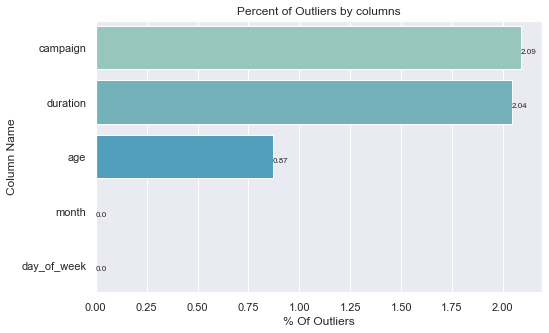

In [1281]:
plt.figure(figsize=(8,5))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)

### Z-Score

In [1282]:
count=0
for feature in df[metric_features].columns:
    zscore=pd.Series(df[feature] - df[feature].mean() ) / df[feature].std()
    df["zscore"]=(df[feature] - df[feature].mean() ) / df[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    df["zscore_outliers"]=df["zscore"].apply(lambda x: -1 if ((x>3) | (x<-3)) else 1)
    #print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df)*100)


4.999696067108383


In [1283]:
df['zscore_outliers'].value_counts()

 1    32215
-1      687
Name: zscore_outliers, dtype: int64

In [1284]:
#len(df[(df['zscore_outliers']==-1) &(df['y']==1)])

In [1285]:
zscore_outliers = df[(df['zscore_outliers']==-1) ].index.to_list()
df = df[~df.index.isin(zscore_outliers)]
df.drop(columns=['zscore_outliers', 'zscore'],inplace=True)

y.drop(zscore_outliers, axis=0, inplace=True)

### DBSCAN

In [1286]:
"""#import the algorithm
from sklearn.cluster import DBSCAN
#initiate the algorithm
#set the distance to 20, and min_samples as 5
outlier_detection = DBSCAN(eps = 40, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(df[metric_features])
#extract the labels from the algorithm
df["dbscan_outliers"] = clusters
#label all others as inliers 
df["dbscan_outliers"] = df["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(df["dbscan_outliers"].value_counts())"""

'#import the algorithm\nfrom sklearn.cluster import DBSCAN\n#initiate the algorithm\n#set the distance to 20, and min_samples as 5\noutlier_detection = DBSCAN(eps = 40, metric = "euclidean", min_samples = 10, n_jobs = -1)\n#fit_predict the algorithm to the existing data\nclusters = outlier_detection.fit_predict(df[metric_features])\n#extract the labels from the algorithm\ndf["dbscan_outliers"] = clusters\n#label all others as inliers \ndf["dbscan_outliers"] = df["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))\n#print the vaue counts\nprint(df["dbscan_outliers"].value_counts())'

In [1287]:
#(len(df[df['dbscan_outliers'] == "-1"])/len(df))*100

### Isolation Forest

In [1288]:
"""from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df[metric_features])
#extract outliers from the data
df["iso_forest_outliers"] = preds
df["iso_forest_outliers"] = df["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
df["iso_forest_scores"] = isf.decision_function(df[metric_features])#print how many outliers the data suggests
print(df["iso_forest_outliers"].value_counts())# Out:
print(len(df[df["iso_forest_outliers"]=="-1"])/len(df)*100)"""

'from sklearn.ensemble import IsolationForest\nisf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)\n#use fit_predict on the data as we are using all the data\npreds = isf.fit_predict(df[metric_features])\n#extract outliers from the data\ndf["iso_forest_outliers"] = preds\ndf["iso_forest_outliers"] = df["iso_forest_outliers"].astype(str)\n#extract the scores from the data in terms of strength of outlier\ndf["iso_forest_scores"] = isf.decision_function(df[metric_features])#print how many outliers the data suggests\nprint(df["iso_forest_outliers"].value_counts())# Out:\nprint(len(df[df["iso_forest_outliers"]=="-1"])/len(df)*100)'

In [1289]:
"""#extract the sum of the outlier count
df['outliers_sum'] = (df["dbscan_outliers"].astype(int)+
                           df['iso_forest_outliers'].astype(int)+
                           df['zscore_outliers'].astype(int) )
#print the value counts for eacdf_noNaNh scale
print(df["outliers_sum"].value_counts())
"""

'#extract the sum of the outlier count\ndf[\'outliers_sum\'] = (df["dbscan_outliers"].astype(int)+\n                           df[\'iso_forest_outliers\'].astype(int)+\n                           df[\'zscore_outliers\'].astype(int) )\n#print the value counts for eacdf_noNaNh scale\nprint(df["outliers_sum"].value_counts())\n'

In [1290]:
#len(df[(df['outliers_sum']==-1) &(df['y']==1)])

In [1291]:
"""outliers_index = df[['iso_forest_outliers','dbscan_outliers','zscore_outliers','outliers_sum']].loc[df['outliers_sum']==-1].index.to_list()

df = df[~df.index.isin(outliers_index)]
df.drop(['iso_forest_outliers','dbscan_outliers','zscore','iso_forest_scores','zscore_outliers','outliers_sum'], axis=1, inplace=True)
"""

"outliers_index = df[['iso_forest_outliers','dbscan_outliers','zscore_outliers','outliers_sum']].loc[df['outliers_sum']==-1].index.to_list()\n\ndf = df[~df.index.isin(outliers_index)]\ndf.drop(['iso_forest_outliers','dbscan_outliers','zscore','iso_forest_scores','zscore_outliers','outliers_sum'], axis=1, inplace=True)\n"

In [1292]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

## 3. Modify
### 3.1 Transform and Create Variables

The main purpose of this procedure is to prepare our dataset for the next phase, where we train our model.

Following this idea,it was transformed and created variables, as well as checked incoherent observations. Besides that, the model was partitioned into train set (70%) and validation set (30%), standardized both sets, and evaluate the importance of our variables in the model. 
For this evaluation some different approaches were taken into account. In a first phase, it was performed correlation analysis, and later, some different methods were implemented, such as Lasso Regression and  Recursive Feature Elimination (RFE) in order to identify the most important variables.

Finally, since it was noticed that the target variable is imbalanced, it was considered that it may be useful to perform artificial resampling.

## Treatment of Categorial/Ordinal Variables
### Age


In [1293]:
"""# Create group of ages
df.loc[df['age'] < 30, 'age'] = 1
df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age'] = 2
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age'] = 3
df.loc[df['age'] >= 50, 'age'] = 4

test_df.loc[test_df['age'] < 30, 'age'] = 1
test_df.loc[(test_df['age'] >= 30) & (test_df['age'] < 40), 'age'] = 2
test_df.loc[(test_df['age'] >= 40) & (test_df['age'] < 50), 'age'] = 3
test_df.loc[test_df['age'] >= 50, 'age'] = 4"""

"# Create group of ages\ndf.loc[df['age'] < 30, 'age'] = 1\ndf.loc[(df['age'] >= 30) & (df['age'] < 40), 'age'] = 2\ndf.loc[(df['age'] >= 40) & (df['age'] < 50), 'age'] = 3\ndf.loc[df['age'] >= 50, 'age'] = 4\n\ntest_df.loc[test_df['age'] < 30, 'age'] = 1\ntest_df.loc[(test_df['age'] >= 30) & (test_df['age'] < 40), 'age'] = 2\ntest_df.loc[(test_df['age'] >= 40) & (test_df['age'] < 50), 'age'] = 3\ntest_df.loc[test_df['age'] >= 50, 'age'] = 4"

In [1294]:
df['age'].describe()

count    32215.000000
mean        40.006922
std         10.418444
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

### Month
The variable '`month`' was transformed to an ordinal variable - 1:jan, 2:fev, etc.

In [1295]:
"""df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,
         "nov":9, "dec":10}, inplace = True)

test_df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,
         "nov":9, "dec":10}, inplace = True)"""

'df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,\n         "nov":9, "dec":10}, inplace = True)\n\ntest_df["month"].replace({"mar":1, "apr": 2, "may": 3, "jun": 4, "jul":5, "aug":6, "sep":7, "oct":8,\n         "nov":9, "dec":10}, inplace = True)'

### Education
The variable '`education`' was transformed to an ordinal variable - 1:illiterate, 2:"basic.4y", etc.

Try: Increase the values of each value- Ex: illiterate: 1, basic.4y: 4, basic.6y: 6 - to reflect the years of study and preserve the distance.



In [1296]:
df["education"].replace({"illiterate": 1, "basic.4y": 4, "basic.6y":6, "basic.9y":9,
             "high.school":12, "professional.course":13, "university.degree":15}, inplace=True)

test_df["education"].replace({"illiterate": 1, "basic.4y": 4, "basic.6y":6, "basic.9y":9,
             "high.school":12, "professional.course":13, "university.degree":15}, inplace=True)

### Day of Week
'`day_of_week`' was transformed to an ordinal variable - 1:monday, 2:tue, 3:wedn

In [1297]:
"""df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)
test_df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)"""

'df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)\ntest_df["day_of_week"].replace({"mon": 1, "tue":2, "wed":3, "thu":4, "fri":6}, inplace=True)'


### Job
'`job`' was transformed into 12 dummy variables (since it has 12 classes). The higher number of campaing acceptance were from clients of administrative, blue-collar and technician carreers. 


In [1298]:
df = dummy_variable("job", df)
test_df = dummy_variable("job",test_df)

### Marital
'`marital`' was transformed into an ordinal variable - 1: single, 2: married, 3: divorced

In [1299]:
df["marital"].replace({"married": 2, "single":1, "divorced":3}, inplace=True)
test_df["marital"].replace({"married": 2, "single":1, "divorced":3}, inplace=True)

### Default
'`default`' to a binary column

In [1300]:
df["default"].replace({"no": 0, "yes":1}, inplace=True)
test_df["default"].replace({"no": 0, "yes":1}, inplace=True)

### Housing
'`housing`'  was transformed into a binary column.

In [1301]:
df["housing"].replace({"yes": 1, "no":0}, inplace=True)
test_df["housing"].replace({"yes": 1, "no":0}, inplace=True)

### Loan
'`loan`'  was transformed into 3 dummy variables.

In [1302]:
df["loan"].replace({"yes": 1, "no":0}, inplace=True)
test_df["loan"].replace({"yes": 1, "no":0}, inplace=True)

## Feature Importance
### Correlation Analysis



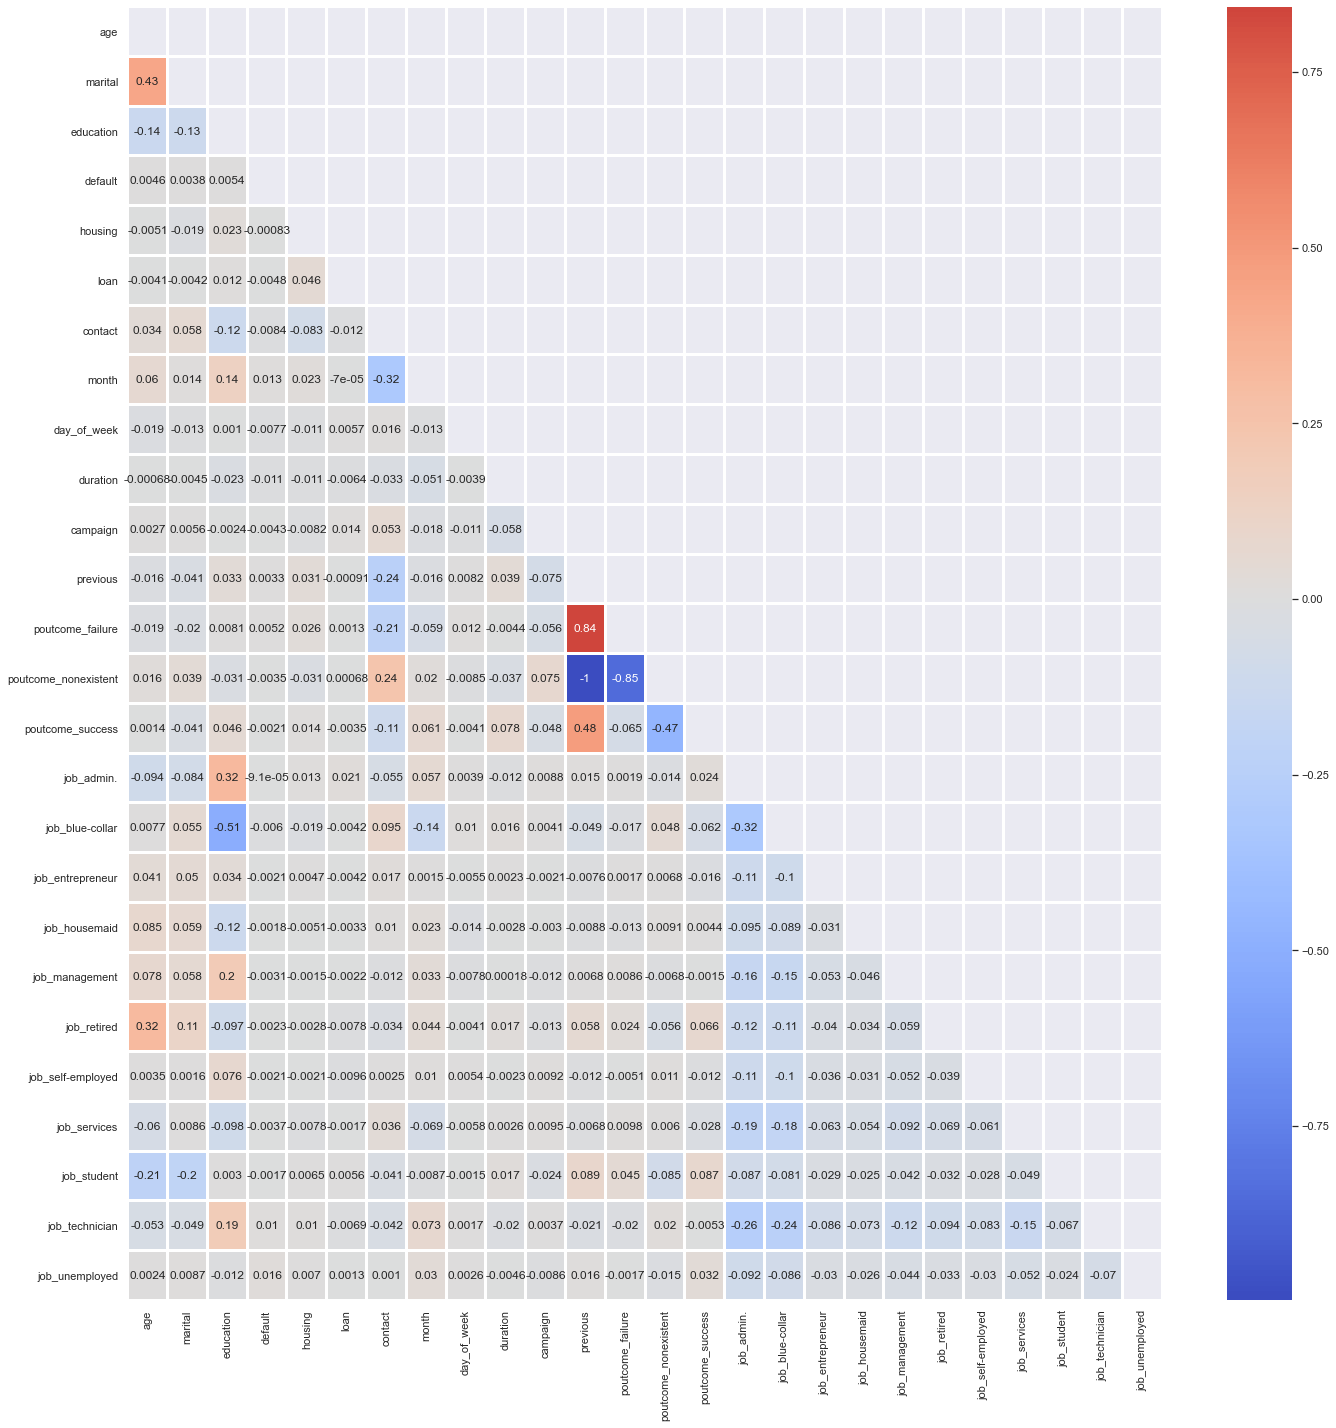

In [1303]:
plt.rcParams['figure.figsize'] = (20,20)
corr_matrix=df.corr(method = 'spearman')
mask=np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=corr_matrix, mask=mask, center=0, annot=True, linewidths=2, cmap='coolwarm')
plt.tight_layout()

From the above heatmap, we observe the following: 
- In general, there is very little correlation among the different features the dataset. 
- The very few cases of moderate correlation (0.3 < |corr| <0.7 are: 
    - age & job_retired (0.32), age & marital (0.43)
    - education & job_blue-collar (0.51), education & job_admin (0.32)
    - contact & month (0.33)
    - y & duration (0.35), y & poutcome_sucess (0.32)
    - poucome_sucess & previous (0.48), previous & poutcome_failure (0.84)

- remove the variable "poutcome_nonexistent" since corr(previous,poutcome_nonexistent) = -1
After this removel, the variable "poucome_success" and "poutome_failure" will be replaced by one binary variable ("poutcome") with 0- failure and 1-sucess.



In [1304]:
df.columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [1305]:
# Replace "poucome_sucess" and "poutome_failure" by "poutcome"
df['poutcome'] = 0
df.loc[(df['poutcome_success'] == 1.0), 'poutcome'] = 1

df.drop(columns=['poutcome_nonexistent', 'poutcome_success', 'poutcome_failure'], inplace=True)


test_df['poutcome'] = 0
test_df.loc[(test_df['poutcome_success'] == 1.0), 'poutcome'] = 1


test_df.drop(columns=['poutcome_nonexistent', 'poutcome_success', 'poutcome_failure'], inplace=True)

In [1306]:
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome
0,49,2,9,0,0,0,0,9,3,227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,37,2,15,0,0,0,1,9,3,202,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,78,2,4,0,0,0,0,5,1,1148,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,36,2,15,0,1,0,1,3,1,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59,3,15,0,0,0,0,4,2,368,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [1307]:
test_df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_admin.,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,poutcome
0,34,2,12,0,0,0,1,3,4,214,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,29,1,9,0,0,0,0,5,4,190,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,35,1,12,0,0,0,0,3,3,152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,60,3,12,0,1,0,0,5,6,179,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,45,2,15,0,0,0,1,3,3,105,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [1308]:
#variables_selection = ['job_management','job_housemaid','job_self-employed','default','loan','housing','campaign','day_of_week']


#variables_selection = ['job_management','job_housemaid','job_self-employed','default','loan']

variables_selection = ['day_of_week', 'housing', 'job_housemaid', 'job_unemployed']

In [1309]:
df.columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome'],
      dtype='object')

## 3.4. Train Validation Partition

In [1310]:
## Hold Out - 80/20
X_all = df.copy()
X_all.drop(variables_selection, axis=1,inplace=True)


X = df.copy()
X.drop(variables_selection, axis=1,inplace=True)


test_df.drop(['day_of_week', 'housing'], axis=1,inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=15, shuffle=True, stratify=y)


## Data Standardization

In [1311]:
columns_c = X_train.columns
X_all_columns = X_all.columns
test_columns = test_df.columns

#scaler = StandardScaler().fit(X_train)
#scaler_X = StandardScaler().fit(X_all)

# Robust Scaler
scaler_robust = RobustScaler().fit(X_train) # robust standardization
scaler_robust_X = RobustScaler().fit(X_all)


X_train = scaler_robust.transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns_c)

X_val = scaler_robust.transform(X_val)
X_val = pd.DataFrame(X_val, columns=columns_c)

X_all = scaler_robust_X.transform(X_all)
X_all = pd.DataFrame(X_all, columns=X_all_columns)

test = scaler_robust.transform(test_df)
test = pd.DataFrame(test, columns=test_columns)

# Feature Importance 

### RFE Selection


In [1312]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

### Embedded Method - LASSO

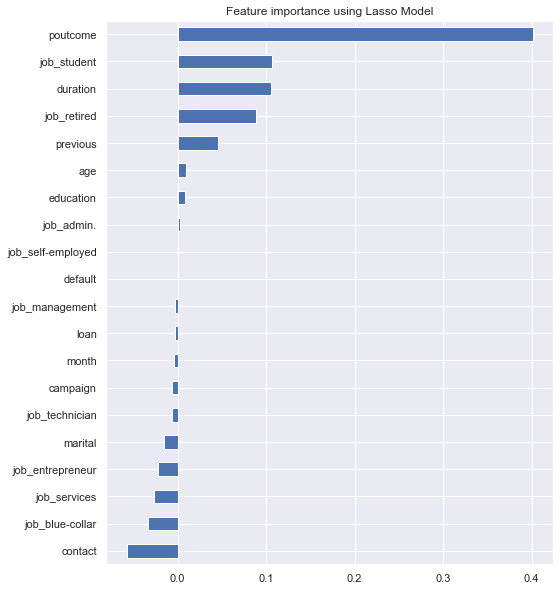

In [1313]:
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.Series(reg.coef_, index=X_train.columns)
coef.sort_values()
plot_importance(coef, 'Lasso')

### Ridge

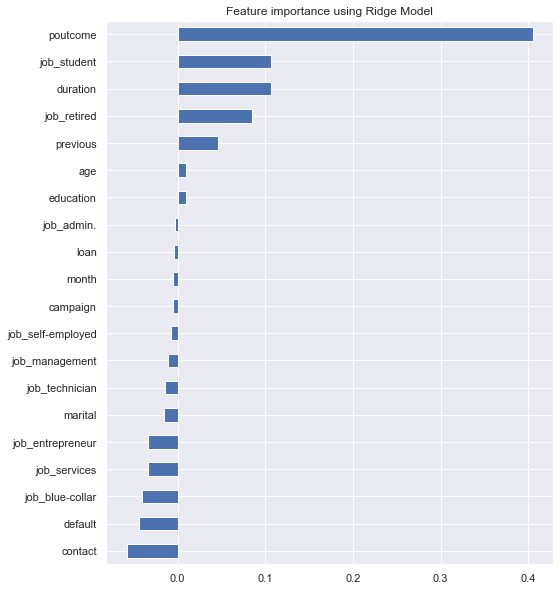

In [1314]:
ridge = RidgeCV()
ridge.fit(X=X_train, y=y_train)
coef_ridge = pd.Series(ridge.coef_, index=X_train.columns)
#print(coef_ridge.sort_values())
plot_importance(coef_ridge,'Ridge')

## Artificial Resampling
### Random Oversampling

### Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# SMOTE leaded to a high overfitting
"""oversample = SMOTE()

X_train_OS, y_train_OS = oversample.fit_resample(X_train, y_train)

print("Before SMOTE: ", y_train.value_counts() )
print("---------------------")
print("Before SMOTE: ", y_train_OS.value_counts() )"""


"""from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler 


smt = SMOTEENN(random_state=42)

X_train_OS, y_train_OS = smt.fit_resample(X_train, y_train)

###oversample = RandomOverSampler(sampling_strategy='minority')
###X_all, y = oversample.fit_resample(X_all, y)"""

# Model Exploration - ML
## Hold-Out method (70/30) without K-Fold

In [1318]:
from sklearn.metrics import f1_score
log_model = LogisticRegression(random_state=0)

log_model.fit(X_train, y_train)

# Predictions for train
y_pred = log_model.predict(X_train)

# Predictions for validation
y_pred_val = log_model.predict(X_val)

#### TREINO
score = f1_score(y_train, y_pred, average='binary')
print('F1 Score Train: ', score)
print('----------------------------')
### VALIDACAO
score_val = f1_score(y_val, y_pred_val, average='binary')
print('F1 Score Validation: ', score_val)

F1 Score Train:  0.43125707814269537
----------------------------
F1 Score Validation:  0.4743150684931507


In [1349]:
from sklearn.metrics import f1_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score
log_model = HistGradientBoostingClassifier(l2_regularization=15, learning_rate=0.25,
                               max_depth=9, max_iter=1348, min_samples_leaf=75)
log_model.fit(X_train, y_train)

# Predictions for train
y_pred = log_model.predict(X_train)

# Predictions for validation
y_pred_val = log_model.predict(X_val)

#### TREINO
score = f1_score(y_train, y_pred, average='binary')
auc = roc_auc_score(y_train, y_pred)
print('F1 Score Train: ', score)
print('AUC Score Train: ', auc)
print('----------------------------')
### VALIDACAO
score_val = f1_score(y_val, y_pred_val, average='binary')
auc = roc_auc_score(y_val, y_pred_val)
print('F1 Score Validation: ', score_val)
print('AUC Score Validation: ', auc)


F1 Score Train:  0.5928376800311405
AUC Score Train:  0.7435663179596256
----------------------------
F1 Score Validation:  0.5531273549359457
AUC Score Validation:  0.7294415267130555


In [1361]:
"""# Fit to test


y_pred = log_model.predict(test)
np.savetxt("y_pred.csv", 
           y_pred,
           delimiter =", ", 
           fmt ='% s')"""

In [1315]:
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
log_model = GradientBoostingClassifier(random_state=0)

log_model.fit(X_train, y_train)

# Predictions for train
y_pred = log_model.predict(X_train)

# Predictions for validation
y_pred_val = log_model.predict(X_val)

#### TREINO
score = f1_score(y_train, y_pred, average='binary')
print('F1 Score Train: ', score)
print('----------------------------')
### VALIDACAO
score_val = f1_score(y_val, y_pred_val, average='binary')
print('F1 Score Validation: ', score_val)



F1 Score Train:  0.539577289680895
----------------------------
F1 Score Validation:  0.5285714285714286


In [ ]:
"""from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=0)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)

# from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0)

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)


from sklearn import svm
svc=svm.SVC(random_state=0)
"""



# Models without SMOTE

In [1342]:

from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score as fbeta_scorer
from imblearn.combine import SMOTEENN

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
def run_model_LR(X,y):
    #model = BaggingClassifier(random_state=0).fit(X,y)
    
    model = HistGradientBoostingClassifier(l2_regularization=15, learning_rate=0.25,
                               max_depth=9, max_iter=1348, min_samples_leaf=75).fit(X,y)
    #model = HistGradientBoostingClassifier(l2_regularization=8, max_depth=6,
                               #max_iter=1332, learning_rate = 0.1).fit(X,y)
        
    #model = DecisionTreeClassifier(random_state=0).fit(X,y)
    #model = GradientBoostingClassifier(learning_rate=0.25, max_depth=7, max_features='auto',
                           #min_samples_leaf=99, min_samples_split=42,
                           #n_estimators=55).fit(X,y)

    #model = GradientBoostingClassifier(random_state=0).fit(X,y)
    #model = LogisticRegression(random_state=0).fit(X,y)
    return model

def evaluate_model(X,y, model):
    return f1_score(y,model.predict(X))


def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model = run_model_LR(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))
    
kf = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=10, n_repeats=2)
#loo = LeaveOneOut()

In [1343]:
f1_sc = avg_score_LR(kf, X_all, y)

Train: 0.5951164063606382
Test: 0.5298346074026576


# Model fit with SMOTE

This attempt led to a drastic overfitting due to the difference of target percentage.

In [1345]:
"""from sklearn.metrics import f1_score
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


def run_model_LR(X,y):
    #model = LogisticRegression().fit(X,y)
    #model = HistGradientBoostingClassifier(l2_regularization=8, max_depth=6,
                               #max_iter=1332, learning_rate = 0.1 ).fit(X,y)
    #model = DecisionTreeClassifier(random_state=0).fit(X,y)
    #model = BaggingClassifier(random_state=0).fit(X,y)
    
    model = HistGradientBoostingClassifier(l2_regularization=15, learning_rate=0.25,
                               max_depth=9, max_iter=1348, min_samples_leaf=75).fit(X,y)
    #model = GradientBoostingClassifier(random_state=0).fit(X,y)
    return model

def evaluate_model(X,y, model):
    return f1_score(y,model.predict(X))

def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # With SMOTE
        smt = SMOTEENN(random_state = 0)
        
        #smt = EasyEnsemble(random_state=0, n_subsets=10)
        #smt.fit(X, y)
        #X_train_sm, y_train_sm = smt.sample(X, y)
        smt = RandomUnderSampler(random_state=0)
        X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
        model = run_model_LR(X_train_sm, y_train_sm)
        value_train = evaluate_model(X_train_sm, y_train_sm, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))
    
kf = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=10, n_repeats=2)
loo = LeaveOneOut()"""

In [1346]:
#avg_score_LR(kf, X_all, y)

Train: 0.9995481288165134
Test: 0.5205853142601706


## HyperTunning 
### learning_rate

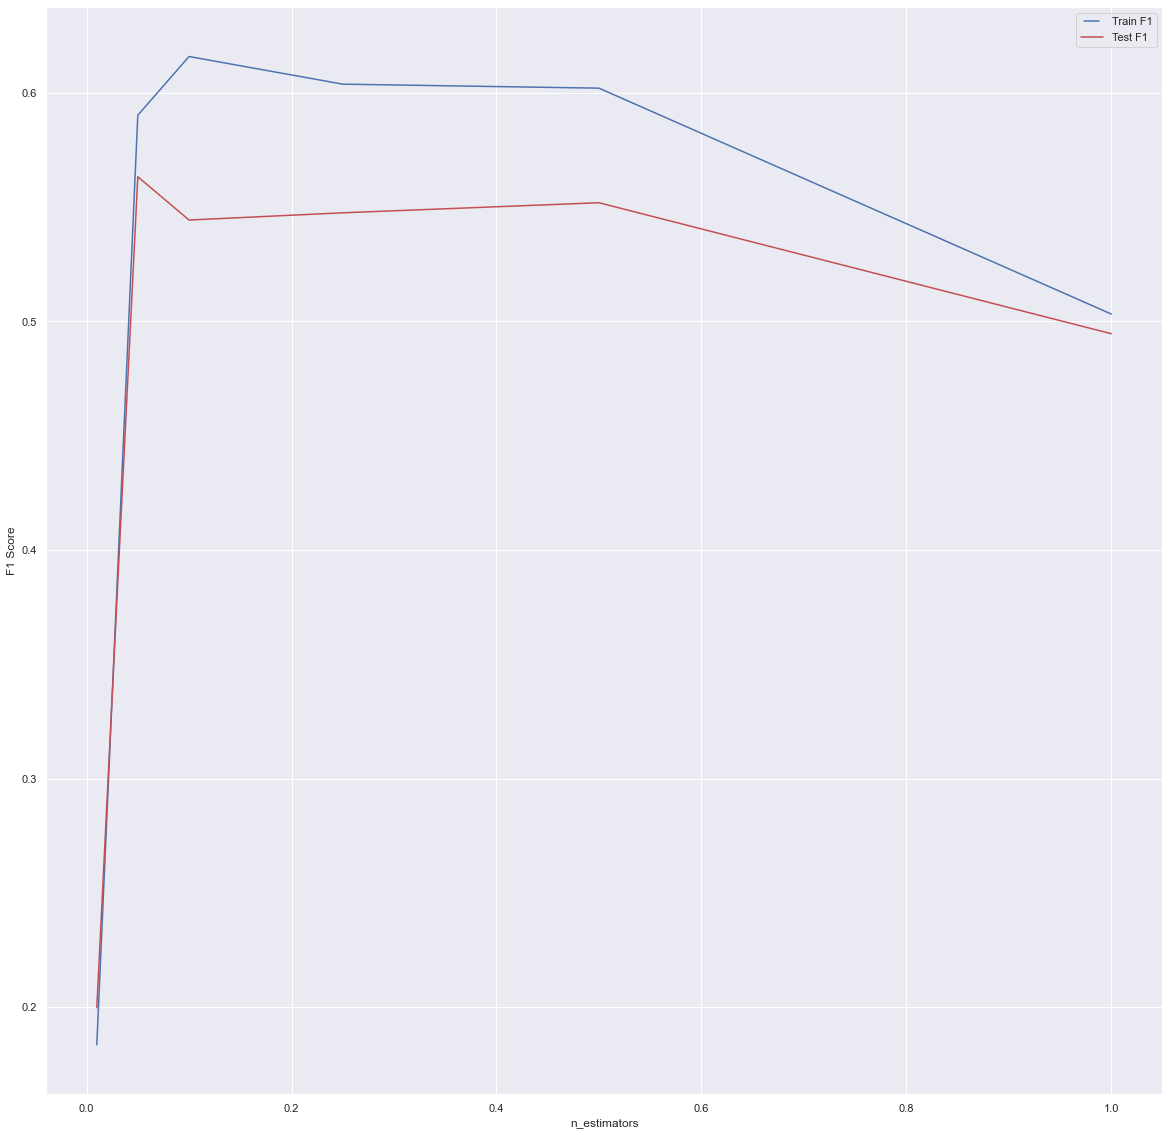

In [1328]:
from sklearn.metrics import fbeta_score
from matplotlib.legend_handler import HandlerLine2D
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
diff=[]

for learning in learning_rates:
    rf = HistGradientBoostingClassifier(learning_rate=learning)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(learning_rates, train_results, 'b', label='Train F1')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()

In [847]:
df_estimator=pd.DataFrame([pd.Series(learning_rates,name='learning_rate'),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]

,learning_rate,Train,Val,Diff
2,0.25,0.619268,0.554470,-0.064797
4,0.05,0.588097,0.547384,-0.040712
1,0.50,0.615561,0.543704,-0.071857
3,0.10,0.610453,0.543116,-0.067336
0,1.00,0.510328,0.475138,-0.035190


### N_estimators

In [ ]:
"""n_estimators = np.arange(5, 60)
train_results = []
test_results = []
diff=[]

for estimator in n_estimators:
    rf = BoostingClassifier(n_estimators=estimator)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()"""

In [ ]:
"""df_estimator=pd.DataFrame([pd.Series(n_estimators,name='n_estimators',dtype=int),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]"""

### Max depth

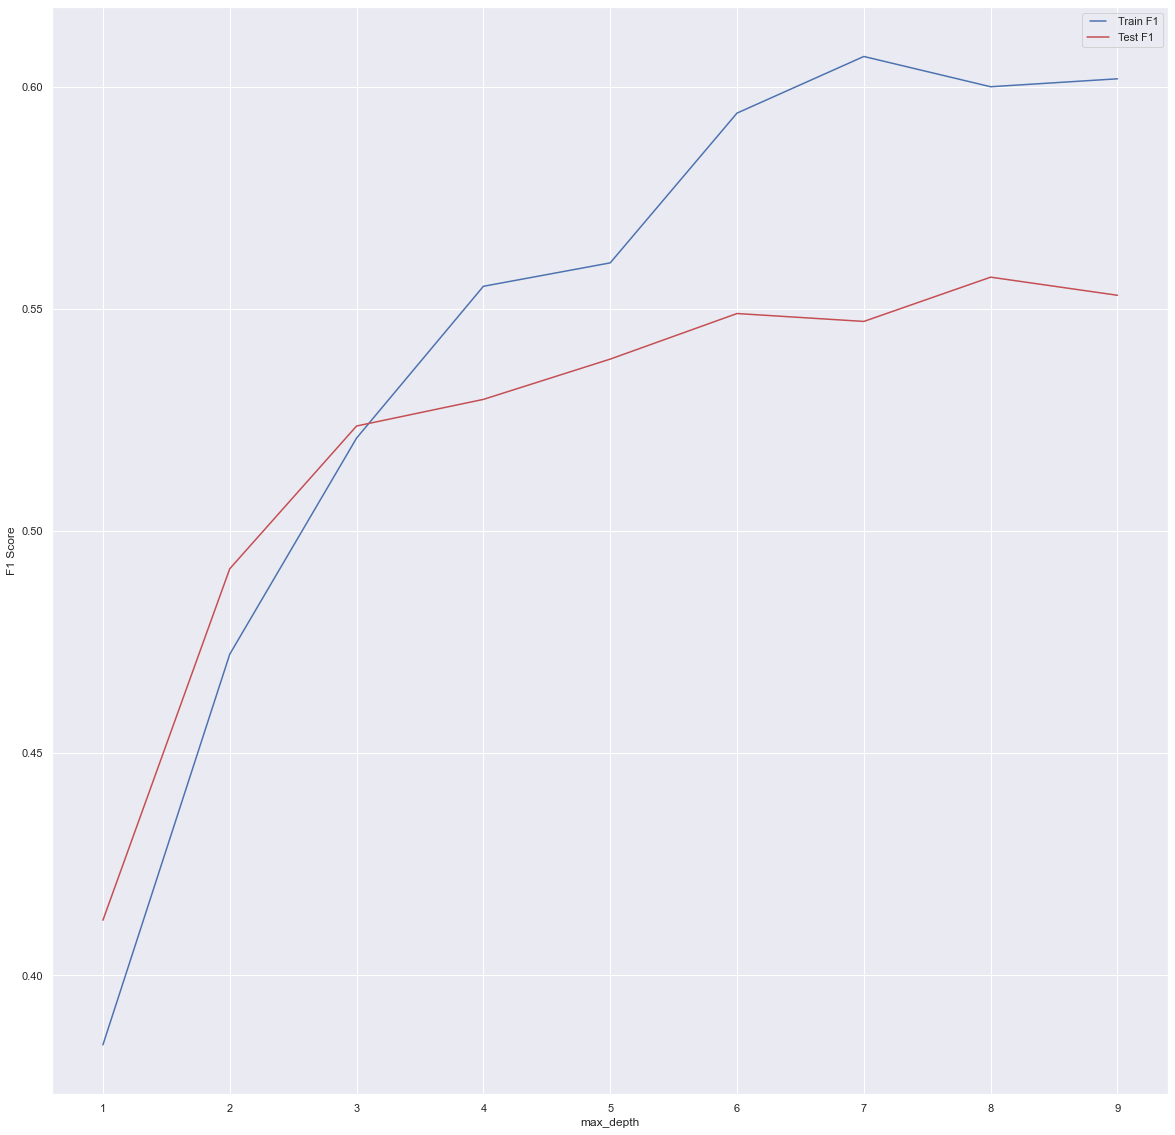

In [1329]:
max_depth = np.arange(1, 10)
train_results = []
test_results = []
diff=[]

for m_depth in max_depth:
    rf = HistGradientBoostingClassifier(max_depth=m_depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('max_depth')
plt.show()

In [1330]:
df_estimator=pd.DataFrame([pd.Series(max_depth,name='max_depth',dtype=int),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]

,max_depth,Train,Val,Diff
7,8.0,0.600079,0.557207,-0.042872
8,9.0,0.601866,0.553127,-0.048739
5,6.0,0.594146,0.549020,-0.045126
6,7.0,0.606894,0.547241,-0.059653
4,5.0,0.560422,0.538757,-0.021665


### min_samples_split

In [ ]:
"""min_samples_split = np.arange(2, 101)
train_results = []
test_results = []
diff=[]

for min_samp_split in min_samples_split:
    rf = GradientBoostingClassifier(min_samples_split=min_samp_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train F1')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_split')
plt.show()"""

### Min_samples_leaf - Hist

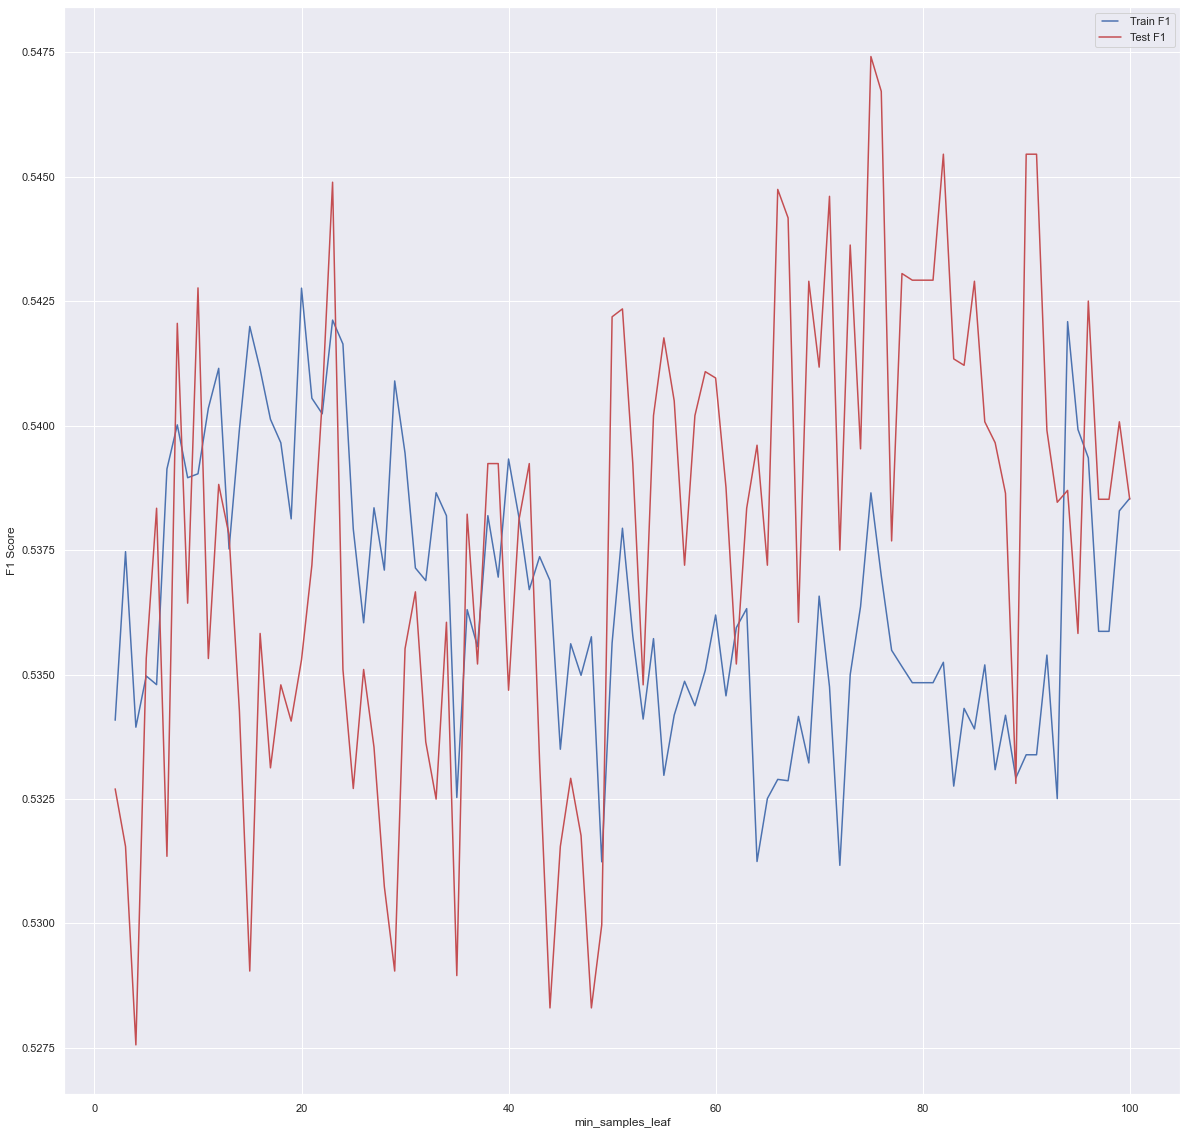

In [1331]:
min_samples_leaf = np.arange(2, 101)
train_results = []
test_results = []
diff=[]

for leaf in min_samples_leaf:
    rf = GradientBoostingClassifier(min_samples_leaf=leaf)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train F1')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_leaf')
plt.show()

In [1332]:
df_estimator=pd.DataFrame([pd.Series(min_samples_leaf,name='min_samples_leaf',dtype=int),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]

,min_samples_leaf,Train,Val,Diff
73,75.0,0.538650,0.547417,0.008767
74,76.0,0.536984,0.546718,0.009734
80,82.0,0.535246,0.545455,0.010209
88,90.0,0.533388,0.545455,0.012067
89,91.0,0.533388,0.545455,0.012067


### min_samples_split 

In [864]:
"""min_samples_split = np.arange(200, 400)
train_results = []
test_results = []
diff=[]

for min_samp_split in min_samples_split:
    rf = HistGradientBoostingClassifier(min_samples_split=min_samp_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train F1')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_leaf')
plt.show()"""

"min_samples_split = np.arange(200, 400)\ntrain_results = []\ntest_results = []\ndiff=[]\n\nfor min_samp_split in min_samples_split:\n    rf = HistGradientBoostingClassifier(min_samples_split=min_samp_split)\n    rf.fit(X_train, y_train)\n    train_pred = rf.predict(X_train)\n    train_score = fbeta_score(y_train,train_pred,beta=1)\n    train_results.append(train_score)\n    \n    test_pred = rf.predict(X_val)\n    val_score = fbeta_score(y_val,test_pred,beta=1)\n    test_results.append(val_score)\n    diff.append(val_score-train_score)\n    \nline1, = plt.plot(min_samples_split, train_results, 'b', label='Train F1')\nline2, = plt.plot(min_samples_split, test_results, 'r', label='Test F1')\nplt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})\nplt.ylabel('F1 Score')\nplt.xlabel('min_samples_leaf')\nplt.show()"

In [ ]:
"""df_estimator=pd.DataFrame([pd.Series(min_samples_leaf,name='min_samples_leaf',dtype=int),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]"""

### max_features

In [ ]:
"""X=['auto', 'sqrt', 'log2']
for x in range(len(X_train.columns)):
    X.append(x+1)
    
max_features = X
train_results = []
test_results = []
diff=[]

for max_f in max_features:
    rf = GradientBoostingClassifier(max_features=max_f)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(max_features, train_results, 'b', label='Train F1')
line2, = plt.plot(max_features, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('max_features')
plt.show()   """

In [ ]:
#df_estimator=pd.DataFrame([pd.Series(max_features,name='max_features'),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
#df_estimator.sort_values(by='Val',ascending=False)[:5]

### max iter- Hist

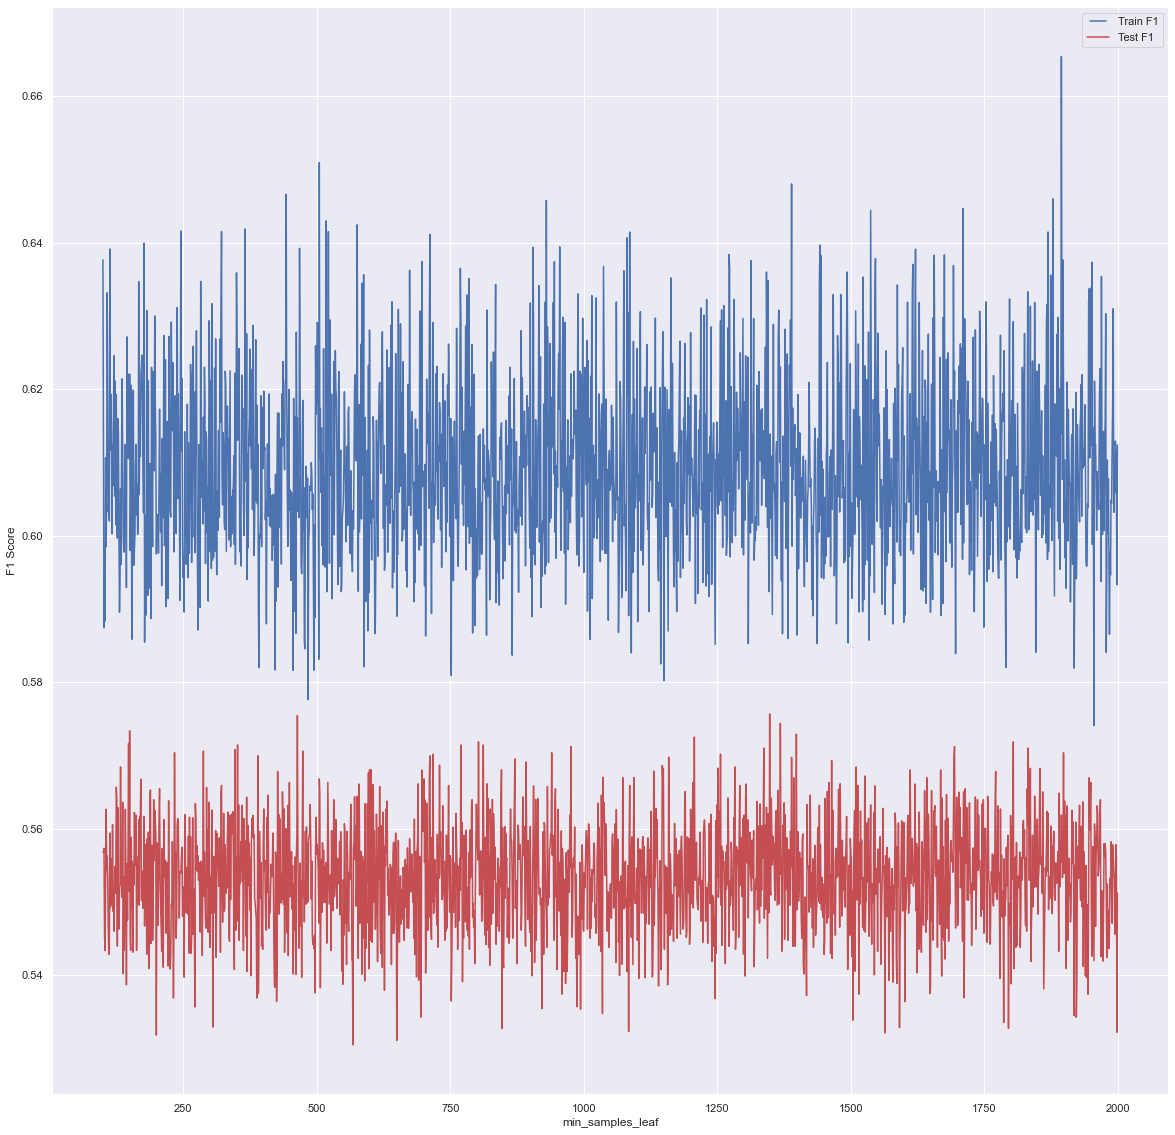

In [1334]:
max_iter_values = np.arange(100, 2000)
train_results = []
test_results = []
diff=[]

for values in max_iter_values:
    rf = HistGradientBoostingClassifier(max_iter=values)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(max_iter_values, train_results, 'b', label='Train F1')
line2, = plt.plot(max_iter_values, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_leaf')
plt.show()

In [1335]:
df_estimator=pd.DataFrame([pd.Series(max_iter_values,name='max_iter'),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]

,max_iter,Train,Val,Diff
1248,1348.0,0.613236,0.575646,-0.037591
364,464.0,0.616094,0.575444,-0.040650
1268,1368.0,0.623014,0.574389,-0.048625
50,150.0,0.622034,0.573353,-0.048680
1298,1398.0,0.611888,0.572909,-0.038979


### l2_regularization - Hist

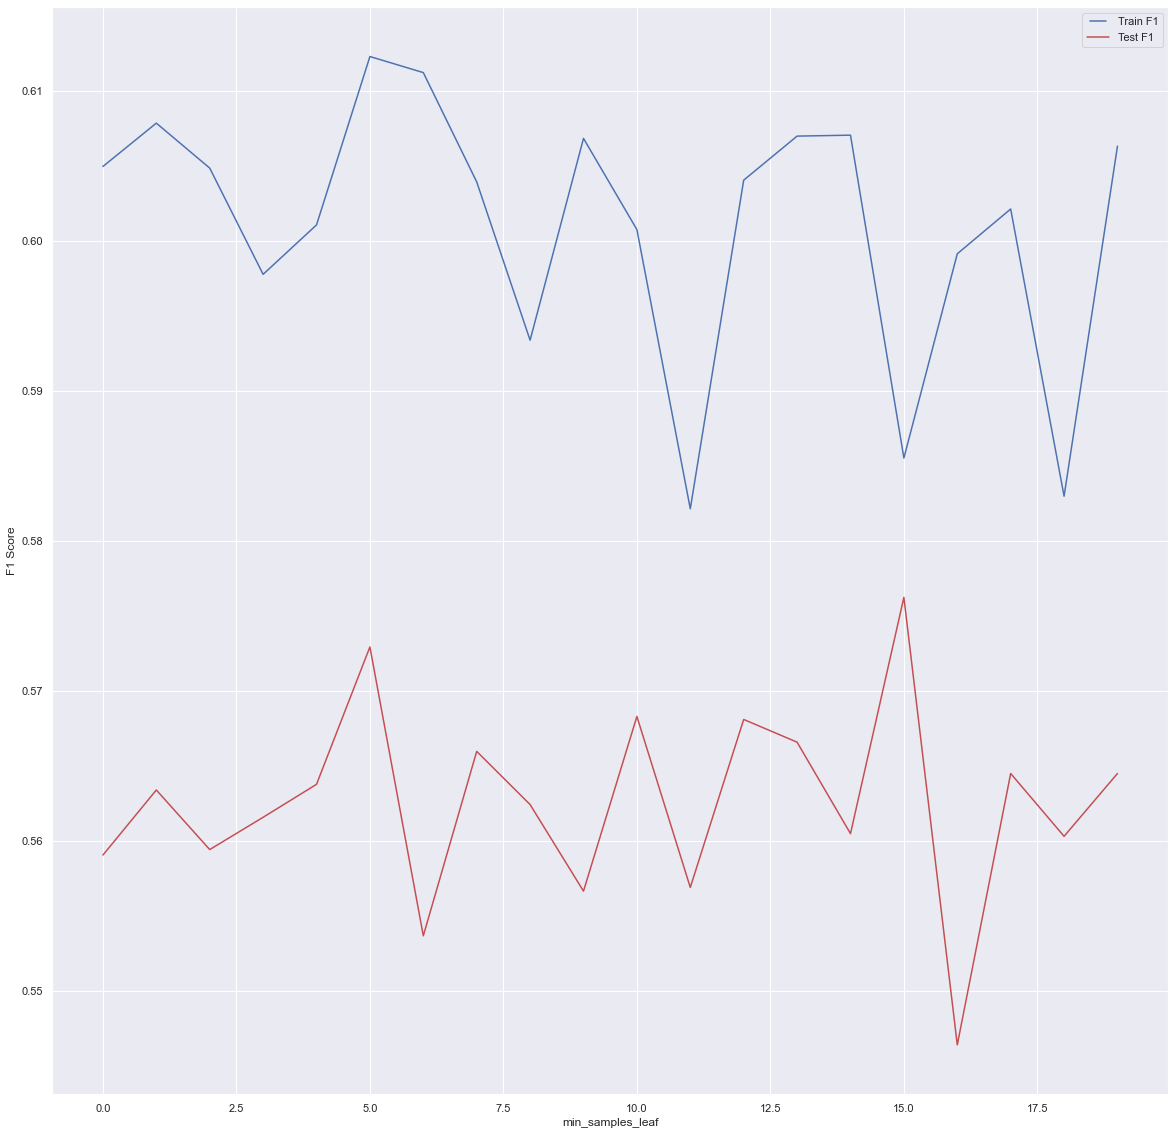

In [1336]:
l2_regularization_values = np.arange(0, 20)
train_results = []
test_results = []
diff=[]

for values in l2_regularization_values:
    rf = HistGradientBoostingClassifier(l2_regularization=values)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = fbeta_score(y_train,train_pred,beta=1)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = fbeta_score(y_val,test_pred,beta=1)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(l2_regularization_values, train_results, 'b', label='Train F1')
line2, = plt.plot(l2_regularization_values, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_leaf')
plt.show()

In [1337]:
df_estimator=pd.DataFrame([pd.Series(l2_regularization_values,name='l2_regularization'),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
df_estimator.sort_values(by='Val',ascending=False)[:5]

,l2_regularization,Train,Val,Diff
15,15.0,0.585506,0.576222,-0.009284
5,5.0,0.612269,0.572917,-0.039352
10,10.0,0.600733,0.568282,-0.032451
12,12.0,0.604027,0.568082,-0.035945
13,13.0,0.606963,0.566568,-0.040395


## Grid Search for Histogram-based Gradient Boosting Classification Tree

In [ ]:
"""#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
param_test1 = {'learning_rate':[0.1,0.5,0.25][1:],
               'n_estimators':np.arange(48,59),
               'min_samples_split':[43, 42],
               'min_samples_leaf':[100, 99],
               'max_depth': [4,5,7],
               'max_features': ['auto',17,19]
              }
gsearch1 = RandomizedSearchCV(estimator = HistGradientBoostingClassifier(), 
            param_distributions = param_test1, scoring=fbeta_scorer, 
            cv=10 ,
            random_state=0)
gsearch1.fit(X_train,y_train)"""

In [ ]:
"""gsearch1.best_estimator_"""

## GridSearch for Hist Gradient Boosting Classifier

In [1338]:
#Choose all predictors except target & IDcols
from sklearn.model_selection import GridSearchCV

predictors = [x for x in X_train.columns]
param_test1 = {'learning_rate':[0.25,0.05,0.5,0.1],
               'l2_regularization':[15],
               'min_samples_leaf':[75],
               'max_depth': [7,8,9,6,5],
               'max_iter': [1348]
               
              }
gsearch1 = GridSearchCV(estimator = HistGradientBoostingClassifier(), 
            param_grid = param_test1, scoring='f1', 
            cv=10 ,
            n_jobs = -1)

gsearch1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'l2_regularization': [15],
                         'learning_rate': [0.25, 0.05, 0.5, 0.1],
                         'max_depth': [7, 8, 9, 6, 5], 'max_iter': [1348],
                         'min_samples_leaf': [75]},
             scoring='f1')

In [1347]:
gsearch1.best_estimator_

HistGradientBoostingClassifier(l2_regularization=15, learning_rate=0.25,
                               max_depth=9, max_iter=1348, min_samples_leaf=75)

In [1243]:
test

,age,marital,education,default,loan,contact,month,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,poutcome
0,-0.266667,0.0,0.000000,0.0,0.0,1.0,-0.333333,0.148148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.600000,-1.0,-0.500000,0.0,0.0,0.0,0.333333,0.037037,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.200000,-1.0,0.000000,0.0,0.0,0.0,-0.333333,-0.138889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.466667,1.0,0.000000,0.0,0.0,0.0,0.333333,-0.013889,-0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.466667,0.0,0.500000,0.0,0.0,1.0,-0.333333,-0.356481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.466667,0.0,-0.500000,0.0,0.0,1.0,-0.333333,-0.189815,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.066667,0.0,0.166667,0.0,0.0,1.0,-0.333333,-0.439815,1.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.933333,0.0,0.166667,0.0,1.0,0.0,0.666667,0.018519,-0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,-1.133333,-1.0,0.000000,0.0,0.0,0.0,0.000000,1.009259,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.000000,0.0,0.000000,0.0,0.0,1.0,-0.333333,0.379630,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# ---------------------

In [ ]:
## Deep Learning Model

# Deep Learning

In [1321]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [1323]:
len(X_train.columns)

20

In [1324]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(30, input_dim=20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [1325]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)
    
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[5490,  216],
       [ 374,  363]])

In [1326]:
len(y_pred)

6443

In [1327]:
f1_score(y_val, y_pred, average='binary')

0.5516717325227963